In [142]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = sns.color_palette()
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)

In [143]:
heroes = pd.read_csv('heroes_information.csv')
powers = pd.read_csv('super_hero_powers.csv')

In [144]:
print(heroes.shape)
print(powers.shape)

(734, 11)
(667, 168)


In [193]:
powers.head()
heroes.replace(to_replace='-', value='unknown', inplace=True)
heroes.replace(-99.0, np.nan, inplace=True)

In [146]:
powers = powers * 1
powers.head(2)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
powers.shape

(667, 168)

# most superpowerful comic character

In [148]:
powers.loc[:,'total_powers'] = powers.iloc[:, 1:].sum(axis=1)
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [149]:
powers[['hero_names','total_powers']].head(10)

,hero_names,total_powers
0,3-D Man,4
1,A-Bomb,7
2,Abe Sapien,16
3,Abin Sur,1
4,Abomination,8
5,Abraxas,14
6,Absorbing Man,11
7,Adam Monroe,3
8,Adam Strange,10
9,Agent Bob,1


In [156]:
# most powerfull superhero

powers.sort_values(by='total_powers', ascending=False).head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
563,Spectre,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,49
18,Amazo,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,44
394,Martian Manhunter,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,35
370,Living Tribunal,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,35
388,Man of Miracles,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,34


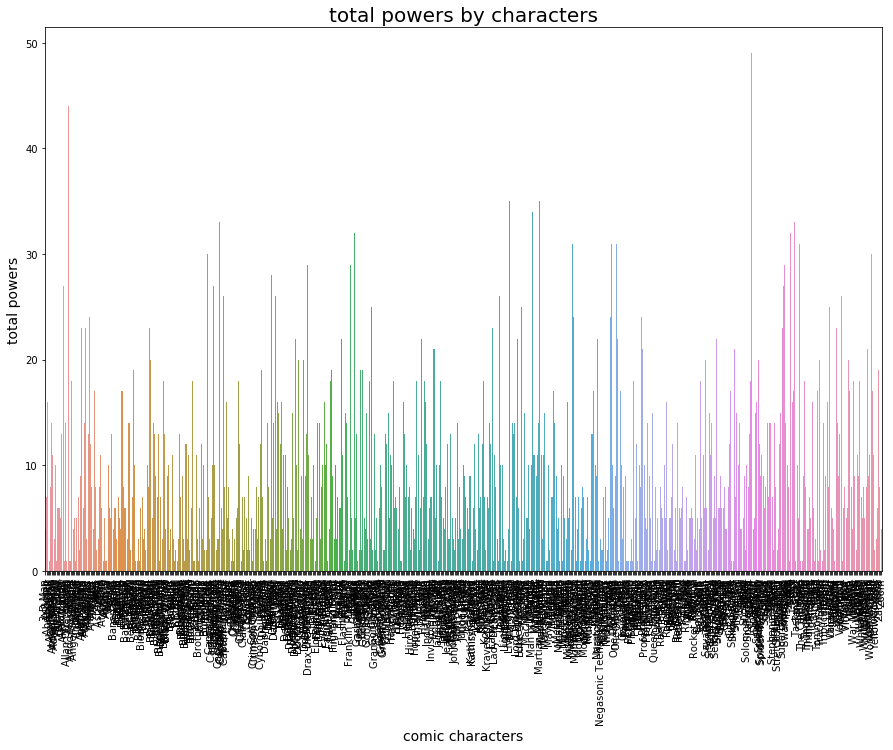

In [157]:
# using seaborn

plt.figure(figsize=(15,10))
sns.barplot(powers['hero_names'], powers['total_powers'], alpha=1)
plt.title("total powers by characters", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("total powers", fontsize=14)
plt.xlabel("comic characters", fontsize=14)
plt.show()

In [158]:
# using plotly

trace = go.Bar(
    x=powers['hero_names'],
    y=powers['total_powers'],
    text = ['names','total_powers']
)

layout = go.Layout(
    title = "comic character by total powers they have"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="most powerful superhero")

In [159]:
top_30_powerful = powers.sort_values('total_powers', ascending=False).head(30)

trace = go.Bar(
    x = top_30_powerful['hero_names'],
    y = top_30_powerful['total_powers'],
    text = ['names', 'total_powers']
)

layout =go.Layout(
    title="top 30 most powerful hero"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="top 30")

# Q:1 top 5 insights of your fav super hero

In [161]:
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [162]:
fav_hero=powers[powers['hero_names']=='Thor'].T
fav_hero_sorted=fav_hero[1:167]
print(fav_hero_sorted)

                      605
Agility                 1
Accelerated Healing     1
Lantern Power Ring      0
Dimensional Awareness   0
Cold Resistance         0
Durability              1
Stealth                 0
Energy Absorption       0
Flight                  1
Danger Sense            0
Underwater breathing    0
Marksmanship            0
Weapons Master          0
Power Augmentation      0
Animal Attributes       0
Longevity               1
Intelligence            0
Super Strength          1
Cryokinesis             0
Telepathy               0
Energy Armor            0
Energy Blasts           0
Duplication             0
Size Changing           0
Density Control         0
Stamina                 1
Astral Travel           0
Audio Control           0
Dexterity               0
Omnitrix                0
...                    ..
Radiation Absorption    0
Intuitive aptitude      0
Vision - Microscopic    0
Melting                 0
Wind Control            0
Super Breath            0
Wallcrawling

In [164]:
fav_hero_sorted.columns=['Power Of Thor']

In [165]:
fav_hero_sorted.sort_values(by='Power Of Thor',ascending=False).head(5)

,Power Of Thor
Agility,1
Weather Control,1
Toxin and Disease Resistance,1
Reflexes,1
Invulnerability,1


# Q3. Top 3 heaviest characters who are also super agile.

In [166]:
heroes.shape
heroes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [167]:
heroes.sort_values(by='Weight',ascending=False).head(5)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
575,Sasquatch,Male,red,-,Orange,305.0,Marvel Comics,-,good,900.0
373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,-,neutral,855.0
203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0
331,Hulk,Male,green,Human / Radiation,Green,244.0,Marvel Comics,green,good,630.0
283,Giganta,Female,green,-,Red,62.5,DC Comics,-,bad,630.0


In [168]:
powers.rename(columns = {'hero_names':'name'},inplace = True)


In [169]:
powers.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [177]:
common=pd.merge(heroes,powers,how='left')

In [178]:
common.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total_powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0


In [182]:
heaviest=common.sort_values(by='Weight',ascending=False)
heaviest[heaviest['Agility']==1].head(3)[['name','Agility','Weight']]

,name,Agility,Weight
575,Sasquatch,1.0,900.0
203,Darkseid,1.0,817.0
331,Hulk,1.0,630.0


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
661,Thor,Male,blue,Asgardian,Blond,198.0,Marvel Comics,-,good,288.0


In [194]:
BMI =heroes['Weight']/(heroes['Height']/100)**2

In [195]:
heroes['BMI']=BMI

In [196]:
heroes.head(5)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,BMI
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0,107.015458
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,17.817494
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,26.296567
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0,107.015458
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,unknown,bad,NaN,NaN


In [354]:
def status(value):
    if(value<= 19):
        return "UnderWeight"#+str(value)
    elif(value>19 and value<=24):
        return "Normal"#+str(value)
    elif(value> 24 and value<=30):
        return "OverWeight"#+str(value)
    elif(value>30):
        return "Obese"#+str(value)
    else:
        return "NaN"#+str(value)

In [355]:
type(heroes['BMI'].values[0])

numpy.float64

In [356]:
data1=[]
for data in heroes['BMI']:
    if(data >=0.0):
        data1.append(status(int(data)))
    else:
        data1.append("NaN")


In [357]:
heroes['Body Status']=data1


In [358]:
heroes.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,BMI,Body Status
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0,107.015458,Obese
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,17.817494,UnderWeight
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,26.296567,OverWeight
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0,107.015458,Obese
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,unknown,bad,NaN,NaN,NaN
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,unknown,bad,122.0,32.752557,Obese
6,Adam Monroe,Male,blue,unknown,Blond,NaN,NBC - Heroes,unknown,good,NaN,NaN,NaN
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,unknown,good,88.0,25.712199,OverWeight
8,Agent 13,Female,blue,unknown,Blond,173.0,Marvel Comics,unknown,good,61.0,20.381570,Normal
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,unknown,good,81.0,25.564954,OverWeight


In [362]:
heroes[heroes['Body Status']=="Obese"].sort_values('Weight',ascending=False).head(3)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,BMI,Body Status
575,Sasquatch,Male,red,unknown,Orange,305.0,Marvel Comics,unknown,good,900.0,96.748186,Obese
373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,unknown,neutral,855.0,103.801187,Obese
203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0,114.603936,Obese


In [ ]:
# no one is obese